In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone
%matplotlib inline

<ipython-input-3-da38ae0aaed9>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.8 MB 33.4 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356234 sha256=470ac6b31155bbdf5ad702270facc6d3b3935128654c7074e7b1cf172ff20c17
  Stored in directory: /tmp/pip-ephem-wheel-cache-t1pejww1/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=23be961861e2ff0fb71fdd147a1824683e74bb53e5f9c2b442ff16612257da3c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

In [4]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset.csv


In [5]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [6]:
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# *result*:
Results obtained by profile report:

Dataset basic information:
- The dataset has data on 4269 customers.
- We have 13 variables including 12 independent variables and 1 dependent variable which is loan_status.
- We have 7 numeric variables: loan_id, 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score','Assets'
- We have 3 categorical variables: education, self_employed, loan_status
- There is no missing value in the dataset.
- There are no duplicates in the dataset.
- ID is uniformly distributed. Therefore, ID acts as an identifier and lacks - - valuable information for the model.

Categorical Variables Analysis:
- Education - 50.2% of candidates are Graduate and 49.8% not Graduate
- self_employed - 50.4% of candidates are self_employed and 49.6% not
self_employed
- loan_status - most of the loan are Approved

Numerical Varibles Analysis:
- no_of_dependents - The mean no_of_dependents of the customers is 2.49 with standard deviation of 1.69. The histogram curve is fairly symmetrical.
- income_annum - The mean annual income is 5059123.9 with standard deviation of 1.75. The histogram curve is fairly symmetrical.
- Income - The mean annual income of the customer is 73.77 with standard deviation of 2806839.8. The curve is moderately positive skewed.
Mortgage - The mean value of house mortgage is 56.5 with standard deviation of 101.71! The curve is highly positive skewed (Skewness = 2.1) and there are a lot of outliers (Kurtosis = 4.76)
As can be seen, ID has a uniform distribution. Values of ID are all unique and actually ID acts as an identifier and lacks valuable information for the model. So, we remove this feature:

In [7]:
df.drop('loan_id', axis=1, inplace=True)

In [8]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [9]:
# creat function remove space in the beginig of name of columns
def remove_space(df):
    df.columns = df.columns.str.strip()
    return df

df = remove_space(df)

In [10]:
df['Assets'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']

In [11]:
df.drop(['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], axis=1, inplace=True)

# Correlation Analysis

In [13]:
# Define a colormap
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

In [14]:
df['loan_status'].replace({' Approved': 'Approved',' Rejected':'Rejected'}, inplace=True)
df['education'].replace({' Graduate': 'Graduate',' Not Graduate':'Not Graduate'}, inplace=True)
df['self_employed'].replace({' Yes': 'Yes',' No':'No'}, inplace=True)

In [15]:
# convert education and self_employed and loan_status to numerical
df['education'] = df['education'].map({'Not Graduate': 0, 'Graduate': 1})
df['self_employed'] = df['self_employed'].map({'No': 0, 'Yes': 1})
df['loan_status'] = df['loan_status'].map({'Rejected': 0, 'Approved': 1})

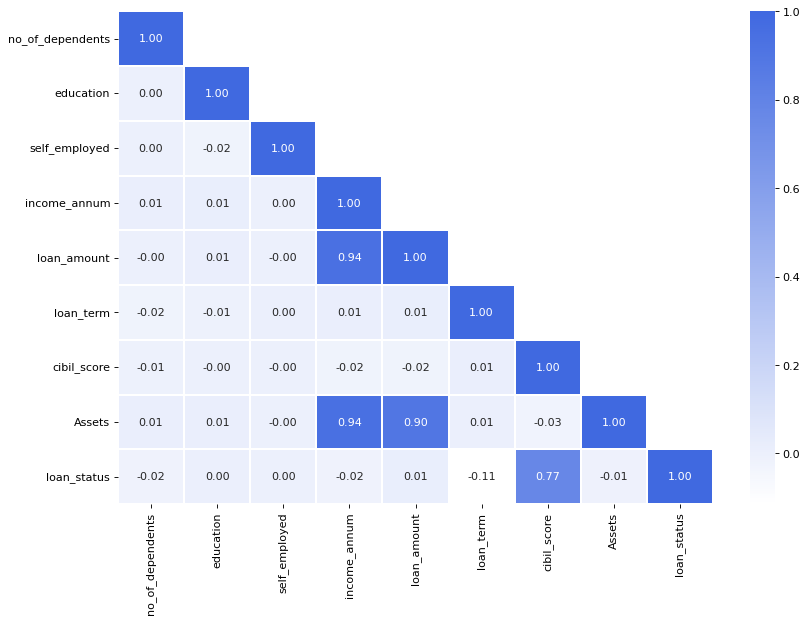

In [16]:
# Calculation of the Spearman correlation
target = 'loan_status'

df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=royalblue, fmt='.2f', linewidths=0.2)
plt.show()

result:

we can see assets has heght relation with income_annum and loan_amount

__Data cleansing__, also known as data cleaning, is the process of preparing and structuring raw data to be used for further analysis. It includes identifying and correcting incorrect or incomplete data, removing irrelevant data, filling in missing values, and transforming existing variables. Data cleaning is an essential step in any machine learning project because it helps improve the accuracy of a model by reducing noise and errors. Poorly cleaned data can lead to overly complex models which are difficult to interpret and have a high chance of overfitting. Furthermore, dirty data can significantly reduce the accuracy of a model; even a small amount of noise will decrease its performance drastically.

__Noise treatment__ is the process by which irrelevant or noisy sections of a dataset are removed before the data can be used for analysis.

there is no any Noise: becasue the deferance between mean and min its not too heigh or if we have negative value

# Outlier Treatment

__Outliers__ are data points that are significantly higher or lower than most other values in the set.

__Kurtosis__ is a measure of the "tailedness" or shape of a distribution. If the Kurtosis value is greater than 3, it is likely that the variable contains outliers. This is because excessive kurtosis indicates that the data points have a higher concentration in the tails than normal, which may indicate the presence of outliers.

there is not any significant outlires

# Missing Value Treatment

we dont have any missing value

# Duplicate Values

we dont have any duplicate value

In [17]:
df.head()

no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          1              0       9600000     29900000   
1                 0          0              1       4100000     12200000   
2                 3          1              0       9100000     29700000   
3                 3          1              0       8200000     30700000   
4                 5          0              1       9800000     24200000   

   loan_term  cibil_score  loan_status    Assets  
0         12          778            1  50700000  
1          8          417            0  17000000  
2         20          506            0  57700000  
3          8          467            0  52700000  
4         20          382            0  55000000

# Imbalanced dataset:



Imbalanced dataset is a dataset where the classes are not balanced or equal. This means there are an unequal number of samples from each target class and some classes may have significantly more samples than others.

As we saw in the 3d step, the dataset we are working on is an imbalanced dataset. Let's check it again:

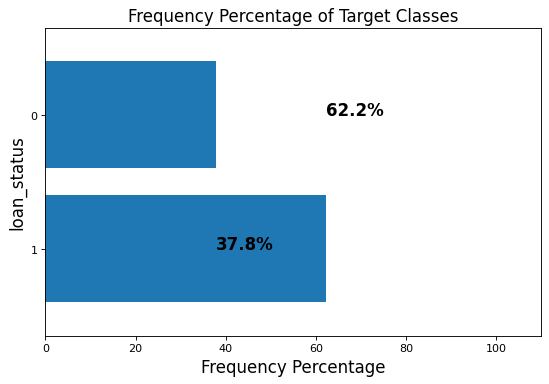

In [18]:
plt.figure(dpi=80)

# Plot frequency percentages barplot
df['loan_status'].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

# Add frequency percentages to the plot
labels = df['loan_status'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=15)
plt.ylabel('loan_status', fontsize=15)
plt.title('Frequency Percentage of Target Classes', fontsize=15)
plt.show()


Problems with Imbalanced Datasets:

1. Imbalanced datasets can lead to algorithms that are biased towards the majority class. This means that any classification algorithm trained on an imbalanced dataset will often inaccurately classify minority classes as the majority class.

2. The performance of a machine learning model can become highly skewed when it is fed with imbalanced data. For example, our dataset has 91.2% class 0 and 8.8% class 1, then the learning model could be easily optimized to just predict all test input as belonging to class 0 and still get 91.2% accuracy!

3. If a model is trained on data which is heavily imbalanced, it can develop an incorrect understanding of the underlying trends in the data. The model may not be able to recognize how certain values are distributed among different classes or even how certain classes overlap with each other.


Techniques to Handle Imbalanced Dataset:

1. The approach to train test split:
The approach to train test split when dealing with imbalanced datasets is to use stratification. Stratification is an important step in splitting imbalanced datasets into training and test sets. Stratification ensures that the proportion of each class remains the same across both the training and test sets. This is important as it allows for a more accurate evaluation of the model, avoiding bias due to a disproportion of one class being over-represented in either dataset. Stratified sampling also ensures that any trends or correlations among different classes that exist within the overall dataset are preserved after splitting into training and test datasets:

In [19]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Let's see the proportion of each class across both the training and test sets:



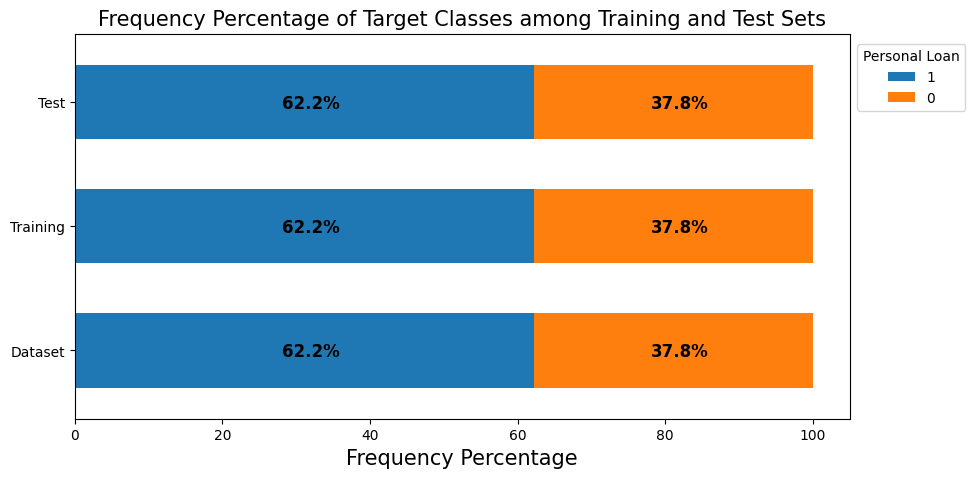

In [21]:
# Define a dataframe containing frequency percentages
df_perc = pd.concat([y.value_counts(normalize=True).mul(100).round(1),
                     y_train.value_counts(normalize=True).mul(100).round(1),
                     y_test.value_counts(normalize=True).mul(100).round(1)], axis=1)
df_perc.columns=['Dataset','Training','Test']
df_perc = df_perc.T

# Plot frequency percentages barplot
df_perc.plot(kind='barh', stacked=True, figsize=(10,5), width=0.6)

# Add the percentages to our plot
for idx, val in enumerate([*df_perc.index.values]):
    for (percentage, y_location) in zip(df_perc.loc[val], df_perc.loc[val].cumsum()):
        plt.text(x=(y_location - percentage) + (percentage / 2)-3,
                 y=idx - 0.05,
                 s=f'{percentage}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(title='Personal Loan', loc=(1.01,0.8))
plt.xlabel('Frequency Percentage', fontsize=15)
plt.title('Frequency Percentage of Target Classes among Training and Test Sets', fontsize=15)
plt.show()

2. The approach for model evaluation:

The approach for model evaluation when dealing with imbalanced datasets is to use appropriate metrics including recall, precision, F1 score and AUC(area under curve) that are better suited when dealing with imbalanced datasets instead of traditional accuracy metrics which don’t take into account class imbalance by default.

In this project, the main goal is to classify potential customers who are more likely to purchase a loan. The metrics used to evaluate the performance of the model will be important in determining how well the model is able to identify these potential customers.

- Recall is a measure of the proportion of actual positive cases that were correctly identified by the model. A high recall score means that the model has a low number of false negatives, which is desirable in this project because it means that the model is not missing many potential loan customers.

- Precision is a measure of the proportion of positive cases identified by the model that are actually positive. A high precision score means that the model has a low number of false positives, which is desirable in this project because it means that the model is not identifying many non-loan customers as potential loan customers.

- F1-score is a measure of the trade-off between recall and precision. It is calculated as the harmonic mean of recall and precision. A high F1-score indicates a balance between high recall and high precision

For this project, both recall and precision for class '1' are important metrics, so f1-score for class '1' should be considered as the most important metric. A high f1-score indicates a balance between identifying as many potential loan customers as possible (high recall) and minimizing the number of false positives (high precision). This is important for the bank, as it wants to increase the conversion rate of depositors to borrowers while reducing the cost of the marketing campaign.

3. Approaches for model building:

I) Data-based approaches:
- Random undersampling: Undersampling involves randomly removing instances from the majority class to reduce its size.
 - Cons: Information loss caused by discarding the majority of the training set.
- Random oversampling: It involves adding additional copies of instances from the minority class to make it more equal in size.
 - Cons: Overfitting, which is caused by replicating observations from the minority class.
- SMOTE: SMOTE (Synthetic Minority Oversampling Technique) is an oversampling technique that creates new, synthetic observations from the minority class. This way, the algorithm avoids the problem of overfitting encountered with random oversampling.
 - Cons: Since SMOTE randomly creates rows of new data, the newly created synthetic samples lack real value information, thus leading to a potential decrease in accuracy overall. In addition, if there are natural boundaries between classes such as overlapping classes, additional outliers may be created due to the artificial creation of data points through SMOTE.

 II) Model-based approaches:

- Penalize Algorithms: Penalize algorithms by giving more weight to a specific classification label, making correct classification of the minority class more important than correct classification of the majority class during optimisation process.
- Use Tree-Based Algorithms: Tree-based algorithms like Random Forest, Extra Trees Classifiers and XGBoost can naturally handle imbalanced data because they make decisions based on a majority vote among randomized decision trees and do not require balancing classes before training.

# Feature Selection

Feature selection is the process of selecting a subset of relevant features for use in model building.


Advantages of Feature Selection:

 1. Enhanced Accuracy: When there are fewer features, the model has fewer potential aspects to learn, which may lead to fewer errors being made when predicting new data.

 2. Improved Interpretability: Feature selection helps to identify important features and also make a model more interpretable by removing redundant or irrelevant features from the data set.

 3. Faster Training Time: Feature selection reduces the computational cost by reducing the number of computations that need to be performed in order to train and test the model. This, in turn, reduces training time and makes models more efficient.

 4. Reduced Overfitting: By removing irrelevant and redundant features from data, feature selection can also help in reducing overfitting which can occur when too many variables are included in a model without sufficient observations or regularization techniques applied.

Feature Selection Methods:

I) Wrapper Methods:

 - These methods use a predictive model to score each subset of features and determine the importance of each feature. Most important wrapper methods are:
Forward Selection: Forward Selection is an iterative feature selection method that starts off with no features in the model and one by one adds the most predictive feature to the model, stopping when there is no improvement on a validation score. This process is repeated until certain criteria are met or all possible sets of features have been considered. By using a metric , the algorithm can identify which combinations of features best improve model performance. The result of Forward Selection is an ordered list that ranks the importance of each feature according to its contribution to improving model accuracy.
 - Permutation: Permutation evaluates the influence of a given feature by shuffling its values and thereby creating a random permutation, measuring how much the model accuracy drops as consequence. The greater the drop in accuracy, the more important this feature proved to be for solving the task at hand.
 - Drop-column: The idea is to calculate the model performance with all predictors and drop a single predictor and see the reduction in the performance. The more important the feature is, the larger the decrease we see in the model performance.

II) Filter Methods:
These methods use statistical measures such as:

 - Correlation Coefficients
 - Information Gain
 - Chi-square Test

III) Embedded Methods:
Embedded methods combine elements of both filter and wrapper approaches by constructing predictive models during the feature selection process in order to better evaluate potential features. Examples of embedded methods include:

 - LASSO Regression
 - Decision Trees
 - Random Forest
 - Gradient Boosting Machines (GBM)

We will continue to use Drop-column Feature Importance method as it is actually the most accurate way to calculate the feature importances.

Note: Drop-column method does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model.

As we discussed earlier, f1-score for calss '1' should be considered as the most important metric for this project:



In [22]:
# Define a scorer function
def f1_metric(model, X_train, y_train):
    '''
    This function reports f1-score metric for the class specified by 'Positive Label' (or '1')
    '''
    return f1_score(y_train, model.predict(X_train), average='binary')

Cloning a model can be useful for creating multiple versions of the same model. This way, different versions of the model can be tested with various parameters or datasets. This can allow for more thorough and accurate evaluation of the model so that one version is not overly biased towards previous versions. Additionally it may be desirable to find out how slightly different parameters affect the performance of a model. Cloning a model allows us to do this quickly and easily by generating multiple models and testing them side-by-side.

Next, we will implement Drop-column Feature Importance Technique through a function using cloning:

In [23]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    # list containing feature importances
    importances = []
    # Clone the model
    model_clone = clone(model)
    # Set random_state for comparability
    model_clone.random_state = random_state
    # Train the model
    model_clone.fit(X_train, y_train)
    # Create the cross-validation object using StratifiedKFold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring=f1_metric).mean()

     # Iterate over all features and store feature importance
    for col in X_train.columns:
        # Clone the model
        model_clone = clone(model)
        # Set random_state for comparability
        model_clone.random_state = random_state
        # Traint the model on the the dataset with a single feature removed
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        # Score the droped-column model
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring=f1_metric).mean()
        # Store feature importance which is defined as the difference between the benchmark and the new model score
        importances.append(benchmark_score - drop_column_score)

    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)

    return importances_df

Define a function to visualize the results of Drop-column Feature Importance technique using bar charts:



In [24]:
# Define a function to visualize the results of Drop-column Feature Importance technique using bar charts:

def drop_column_importance_plot(model, X_train, y_train):
    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']

    # Plot barchart
    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='royalblue')
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

In the next steps, we will use these functions before building our final model regarding each classification algorithm to detect redundant features.

# Naive Bayes Model Building

Naive Bayes is a classification algorithm in machine learning. It is used to predict the probability of a given input belonging to different classes or categories. It is based on Bayes' theorem, which uses the prior probability of the class and the likelihood of the features given the class to calculate the posterior probability of the class. The class with the highest posterior probability is then chosen as the predicted class for the input. The Naive Bayes classifier algorithm makes several assumptions about the data and the problem it is being used to solve

Naive Bayes Main Assumptions:

 1. **Independence**: The algorithm assumes that all the features in the data are independent of each other given the class. This is the "naive" part of the algorithm and is often unrealistic in real-world problems, but it allows for a computationally efficient solution.

 2. **Conditional independence**: The algorithm also assumes that the features are conditionally independent, meaning that the probability of a feature given the class is independent of the other features.**bold text**

 3. **Constant class prior**: The algorithm assumes that the class prior probabilities are constant and do not change with the data.

**Note**: The Naive Bayes basic assumptions have been satisfied since only two features were highly correlated, Experience and Age, and the Experience feature had been removed earlier.


Different types of Naive Bayes algorithms available in sklearn:

 - **Gaussian Naive Bayes**: This algorithm is used when the data is continuous and follows a normal distribution.

 - **Multinomial Naive Bayes**: This algorithm is used when the data is discrete and represents the count of occurrences of each category.

 - **Bernoulli Naive Bayes**: This algorithm is similar to the multinomial Naive Bayes, but it is used when the data is binary.

 - **Complement Naive Bayes**: This algorithm is similar to the Multinomial Naive Bayes, but it is designed for imbalanced data sets.

 - **Categorical Naive Bayes**: This algorithm is similar to the Multinomial Naive Bayes, but it is designed for categorical data, rather than count data.

In this project, our dataset contains a mixture of features with different distributions

Strategies:

 - **First strategy** is to independently fit a Gaussian NB model on the continuous part of the data, a Complement NB model (imbalanced dataset) on the multinomial part of the data, a Bernoulli model on the bernoulli part of the data and a Categorical NB on the categorical part of the data. After fitting each model on the corresponding part of the dataset, then we actually transform the dataset by taking the class assignment probabilities (using predict_proba method) as new features and then refit a new Gaussian NB model on the new features.

 - **Second strategy** is to discretize continuous features and apply different discrete-data based Naive Bayes models, including Complement NB, and Bernoulli NB, in order to find the model with the best performance.

We will implement the second strategy because Income, CCAvg, and Mortgage are continuous features that are important features according to step 6.2, but their distribution is not normal and has high skewness and kurtosis, which causes a large error when performing Gaussian NB.

## Complement NB Model Building

**Multinomial NB** is a probabilistic classifier that is commonly used in text classification tasks. It is based on the assumption that the features (e.g. words) in the text are conditionally independent given the class label. Multinomial NB models the probability of each feature given a class label using a multinomial distribution.

**Complement NB** is a variant of Multinomial NB algorithm that is designed to correct for the bias that is inherent in Multinomial NB algorithm. Multinomial NB algorithm tends to assign higher probability to classes that have more training samples. Complement NB aims to correct for this bias by computing the complement of the standard Naive Bayes probability estimates and then using these complement probabilities to make predictions.

Since our dataset is imbalanced, we will use CNB instead of MNB.

## Complement NB Feature Discretization

KBinsDiscretizer class from scikit-learn provides an implementation of discretization using the binning method. It allows us to choose between different number of bins (n_bins) and strategies for binning.

We will define a function containing **GridSearchCV** class to find the best combination of n_bins and strategy. In other words, we try all combinations of n_bins and strategy within the defined range and use the considered NB model to evaluate the discretizer's performance on the validation set in order to find the optimal combination:

In [26]:
def discretization_report(df, clf):
    '''
    This function finds the optimal combination of n_bins and strategy for continuous features discretization
    '''
    # Define continuous features to perform discretization on
    cols_to_discretize = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term','cibil_score','Assets']

    # Define the features (X) and the output labels (y)
    X = df[cols_to_discretize]
    y = df['loan_status']

    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

    # Define the grid search parameters
    param_grid = {'discretizer__strategy': ['uniform', 'quantile', 'kmeans'],
                  'discretizer__n_bins': np.arange(2,11)}

    # Define the KBinsDiscretizer and OneHotEncoder and ComplementNB objects
    discretizer = KBinsDiscretizer(encode='ordinal')
    onehot = OneHotEncoder(handle_unknown='ignore', drop='first')

    # Create the pipeline
    pipeline = Pipeline([('discretizer', discretizer), ('onehot', onehot), ('clf', clf)])

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1')

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the best score
    print("Best discretization parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    # Return optimal values for n_bins and strategy
    return grid_search.best_params_['discretizer__n_bins'], grid_search.best_params_['discretizer__strategy']

Find optimal values for KBinsDiscretizer parameters using discretization_report function:



In [27]:
# Ignore a warning that in some cases, the width of the bins will be too small
warnings.simplefilter(action='ignore')

# Initialize the CNB classifier
cnb = ComplementNB()

# Call discretization_report
n_bins, strategy = discretization_report(df, cnb)

Best discretization parameters: {'discretizer__n_bins': 7, 'discretizer__strategy': 'quantile'}
Best score: 0.9497448133864681


After obtaining the optimal values for KBinsDiscretizer arguments including n_bins and strategy, we discretize continuous features with these optimal arguments. Then, we implement dummy encoding on non-binary categorical features. We define a function for feature encoding:

In [28]:
def nb_feature_encoding(df, n_bins, strategy, cols_to_encode):
    '''
    This function performs dummy encoding on the desired categorical features after performing feature discretization
    considering optimal n_bins and strategy values.
    '''
    # Define continuous features to perform discretization on
    cols_to_discretize = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term','cibil_score','Assets']

    # Define the features (X) and the output labels (y)
    X = df.drop('loan_status', axis=1)
    y = df['loan_status']

    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

    # Discretize the continuous features
    discretizer = KBinsDiscretizer(n_bins=n_bins, strategy=strategy, encode='ordinal')
    X_train[cols_to_discretize] = discretizer.fit_transform(X_train[cols_to_discretize])
    X_test[cols_to_discretize] = discretizer.transform(X_test[cols_to_discretize])

      # Onehot encode the discretized features
    X_train = pd.get_dummies(X_train, columns=cols_to_encode, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=cols_to_encode, drop_first=True)

    # Align the columns of the test set with the training set
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

    # Return transformed features
    return X_train, X_test

Applying onehot encoding on the desired features using nb_feature_encoding function:



In [30]:
df.head(1)

no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          1              0       9600000     29900000   

   loan_term  cibil_score  loan_status    Assets  
0         12          778            1  50700000

In [31]:
# All non-binary features are selected for onehot encoding
cols_to_encode = ['no_of_dependents', 'income_annum','loan_amount','loan_term','cibil_score','Assets']
# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df, n_bins, strategy, cols_to_encode)

## Complement NB Feature Subset Selection

To find the most important features considering CNB model, we use the drop_column_importance_plot function we defined earlier:

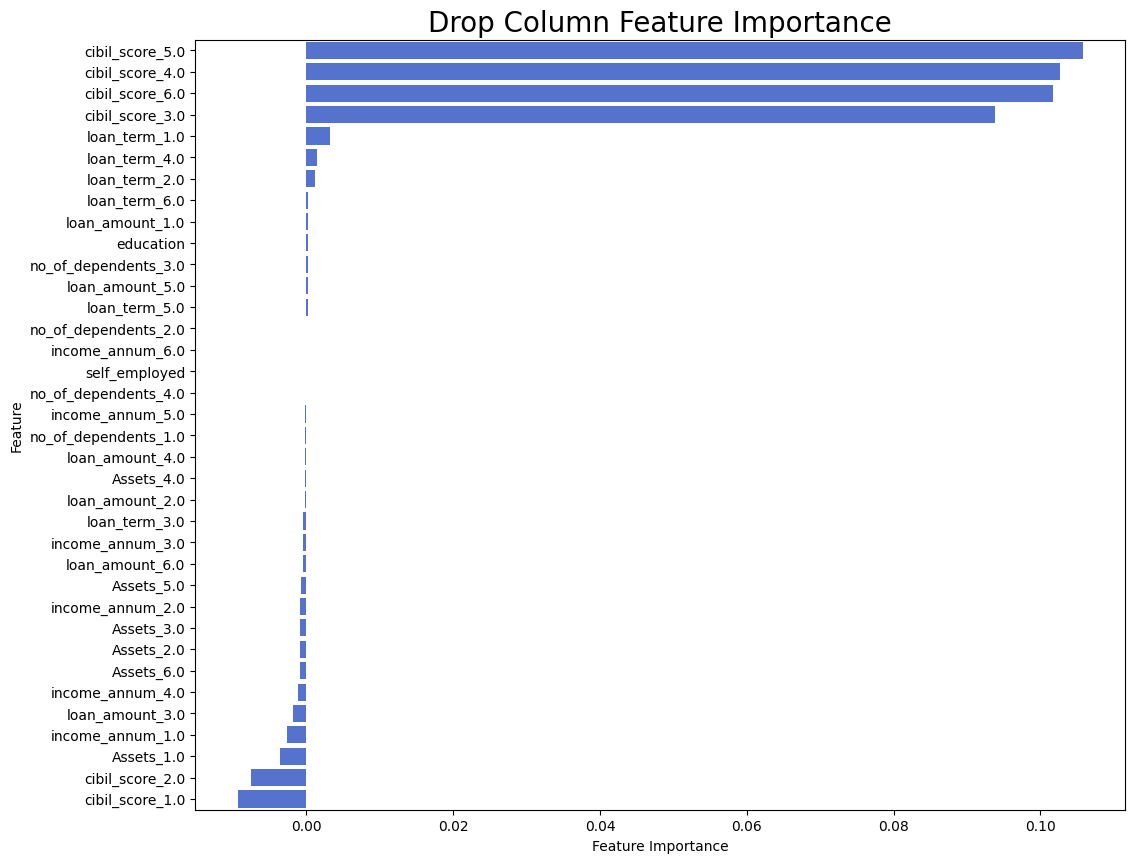

In [32]:
# Initialize the CNB classifier
cnb = ComplementNB()

# Call drop_column_importance_plot
drop_column_importance_plot(cnb, X_train, y_train)

Negative importance in Drop-column Feature Importance means that removing the corresponding feature from the model actually improves the model performance. So we filter our dataset:

In [33]:
feature_importances = drop_column_importance(cnb, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

## Complement NB Model Building



After removing irrelevant features, we train the final CNB model:



In [34]:
cnb = ComplementNB()
cnb.fit(X_train, y_train)

ComplementNB()

## Complement NB Model Evaluation

To evaluate the performance of the model, we define a function so that it can be used to evaluate subsequent models as well:

In [35]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [36]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Plot ROC curve for test data and display AUC score
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()

Let's call the above function for evaluating our CNB model:




	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1290
           1       0.97      0.95      0.96      2125

    accuracy                           0.95      3415
   macro avg       0.94      0.95      0.95      3415
weighted avg       0.95      0.95      0.95      3415


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       323
           1       0.97      0.96      0.97       531

    accuracy                           0.96       854
   macro avg       0.95      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



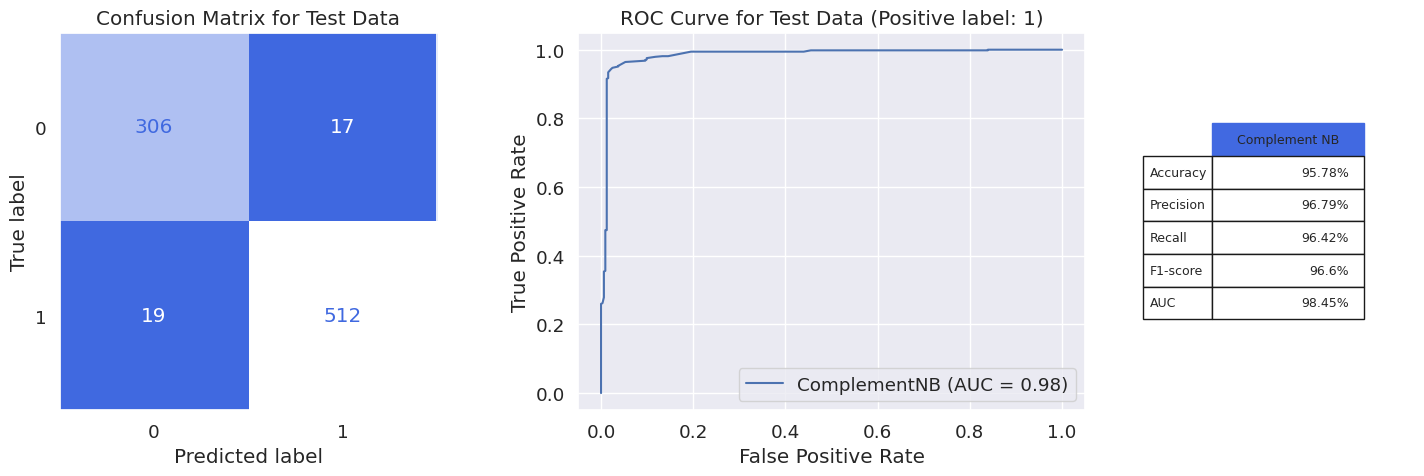

In [37]:
model_evaluation(cnb, X_train, X_test, y_train, y_test, 'Complement NB')

In [38]:
# Save the final performance of Complement Naive Bayes classifier
cnb_result = metrics_calculator(cnb, X_test, y_test, 'Complement Naive Bayes')

# Bernoulli NB Model Building

__Bernoulli NB__, like MultinomialNB, is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed to work with binary data, where the features are either true or false (1 or 0).

To find the optimal values for KBinsDiscretizer considering Bernoulli NB, we call discretization_report function:



In [41]:
# Initialize the Categorical NB classifier
bnb = BernoulliNB()

# Call discretization_report
n_bins, strategy = discretization_report(df, bnb)

Best discretization parameters: {'discretizer__n_bins': 10, 'discretizer__strategy': 'quantile'}
Best score: 0.9123872714625092


The optimal values obtained for n_bins and strategy considering the BNB model are:
* n_bins : 10
* strategy : quantile

In [42]:
df_bnb = df.copy()

Applying onehot encoding on all non-binary features using nb_feature_encoding function:



In [ ]:
df.head(2)

no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          1              0       9600000     29900000   
1                 0          0              1       4100000     12200000   

   loan_term  cibil_score  loan_status    Assets  
0         12          778            1  50700000  
1          8          417            0  17000000

In [43]:
# All non-binary features are selected for onehot encoding
cols_to_encode = ['no_of_dependents', 'income_annum','loan_amount','loan_term','cibil_score','Assets']
# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df_bnb, n_bins, strategy, cols_to_encode)

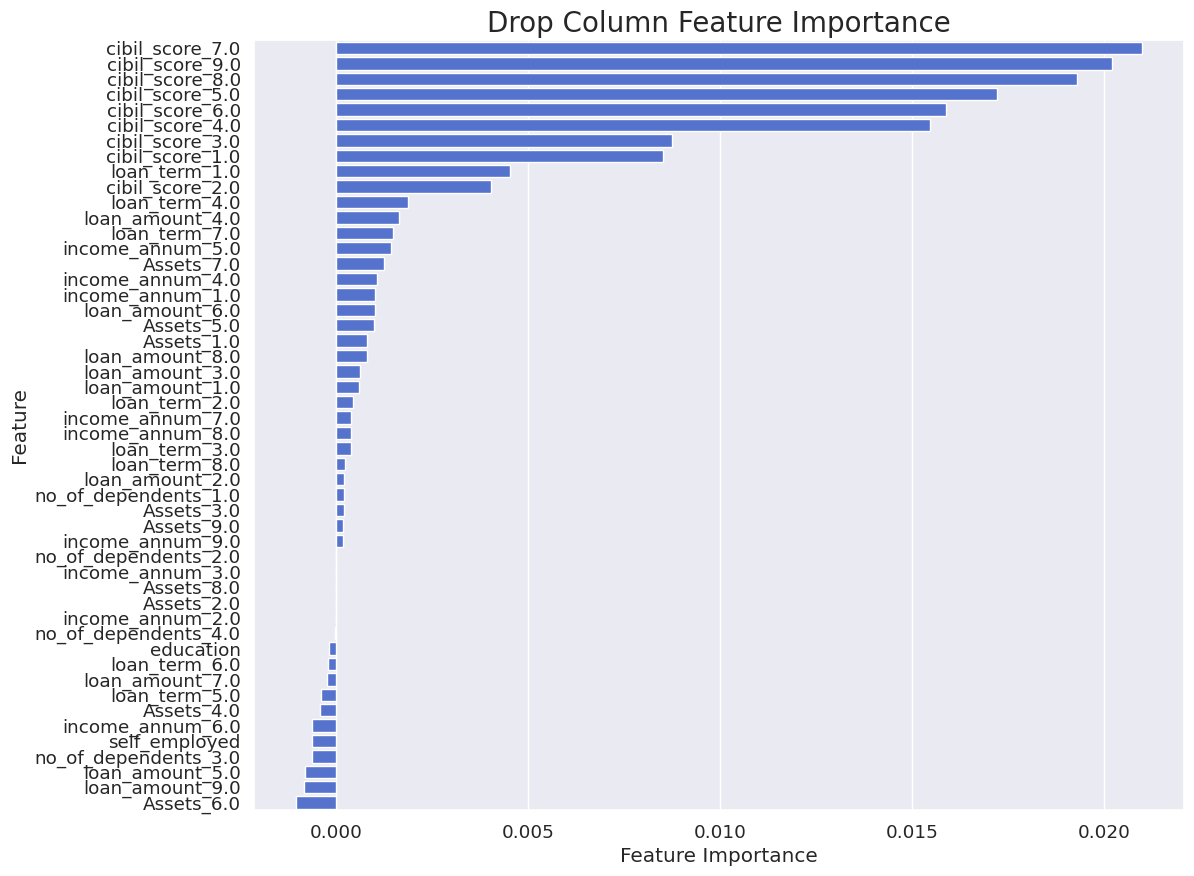

In [44]:
# Initialize the BNB classifier
bnb = BernoulliNB()

# Call drop_column_importance_plot
drop_column_importance_plot(bnb, X_train, y_train)

Again negative importance in Drop-column Feature Importance means that removing the corresponding feature from the model actually improves the model performance. So we filter our dataset:

In [45]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(bnb, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

After removing irrelevant features, we train the final BNB model:



In [46]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

Evaluate our trained Bernoulli NB model performance using model_evaluation function:




	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1290
           1       0.88      0.95      0.91      2125

    accuracy                           0.89      3415
   macro avg       0.89      0.87      0.88      3415
weighted avg       0.89      0.89      0.89      3415


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       323
           1       0.87      0.96      0.91       531

    accuracy                           0.88       854
   macro avg       0.89      0.86      0.87       854
weighted avg       0.89      0.88      0.88       854



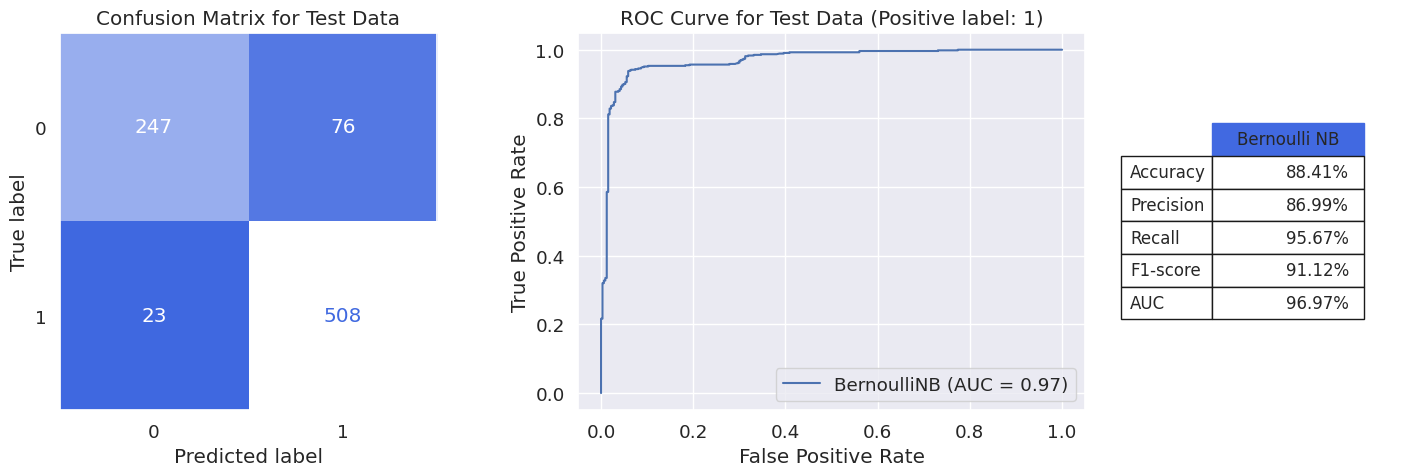

In [47]:
model_evaluation(bnb, X_train, X_test, y_train, y_test, 'Bernoulli NB')


In [ ]:
# Save the final performance of Bernoulli Naive Bayes classifier
bnb_result = metrics_calculator(bnb, X_test, y_test, 'Bernoulli Naive Bayes')

# Logistic Regression Model Building

Logistic Regression is a type of supervised machine learning algorithm used for binary classification problems. It models the probability of a target variable (usually binary) as a function of input features, using a logistic function (sigmoid) to map predictions between 0 and 1. The model is trained using labeled data to optimize the coefficients of the features to minimize the prediction error.

## Scale Data using Standard Scaler

Before building our logistic classifier, we will apply __Standard Scaler__ to our data.

__Standard Scaler__ is used to scale the data. It transforms the data by subtracting the mean and dividing by the standard deviation, ensuring that all features have a similar range of values.


<h3 align="left"><font color='lightblue'>Benefits of Standard Scaling on Logistic Regression:</font></h3>

1. __Gradient Descent Convergence__: The optimization algorithm used in logistic regression is gradient descent. When the features have different scales, the magnitude of the gradient will also be different for different features. Scaling the features to have the same scale ensures that the magnitude of the gradient is the same for all features, which can lead to faster convergence of the optimization algorithm.


2. __Regularization__: Logistic regression uses regularization to prevent overfitting. When the features have different scales, the regularization term in the cost function tends to give more weight to the features with higher values, which can be problematic in certain cases. Scaling the features to have the same scale can alleviate this issue.


3. __Better Performance__: In some cases, scaling the features can lead to a better performance of the logistic regression model, especially when the features have a skewed distribution or are not on the same scale.

In [48]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [49]:
# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Note: It is very important that StandardScaler transformation should only be learnt from the training set, otherwise it will lead to data leakage.

## Logistic Regression Hyperparameter Tuning

Hyperparameter tuning can affect the performance of a logistic regression model by allowing it to find the best combination of hyperparameters that result in the lowest error on the training set. This can lead to improved prediction performance and reduced overfitting. However, if not done, it can lead to overfitting on the validation set, resulting in a model that is not generalizable to new data.

Also, since our dataset is imbalanced, we intend to make the correct classification of the minority class more important than the correct classification of the majority class in the optimization process, which is called penalizing the model. We do this by giving more weight to the minority class. Therefore, the weights of the classes are hyperparameters whose optimal value is also determined during the Hyperparameter tuning process.

## Define the Hyperparameter Grid

Hyperparameter Grid refers to a pre-defined set of hyperparameters to be tested in a model training process. Each combination of hyperparameters is a single point in the grid, and the goal is to select the best hyperparameters for the model by evaluating model performance on a validation set. The grid defines the search space for hyperparameter optimization algorithms to find the optimal hyperparameters.

In Logistic Regression, solver choice is determined by penalty choice. Supported penalties by solvers are:

> * __lbfgs -> [ l2 , None ]__
>
> * __liblinear -> [ l1 , l2 ]__
>
> * __newton-cg -> [ l2 , None ]__
>
> * __sag -> [ l2 , None ]__
>
> * __saga -> [ elasticnet , l1 , l2 , None ]__


Therefore, different combinations of solver and penalty should be considered:

In [50]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,20)]

# Define hyperparameters grid
param_grid = [{'solver':['lbfgs', 'newton-cg', 'sag', 'saga'],
               'penalty':['none'],
               'class_weight':class_weights},

              {'solver':['lbfgs', 'newton-cg', 'sag'],
               'penalty':['l2'],
               'C': np.logspace(-5, 5, 10),
               'class_weight':class_weights},

              {'solver':['liblinear', 'saga'],
               'penalty': ['l1', 'l2'],
               'C': np.logspace(-5, 5, 10),
               'class_weight':class_weights},

              {'solver':['saga'],
               'penalty':['elasticnet'],
               'C': np.logspace(-5, 5, 10),
               'l1_ratio': np.arange(0,1.1,0.1),
               'class_weight':class_weights}]

## Find the Optimal Hyperparameters

We use GridSearchCV to find the optimal combination of hyperparameters that gives the best performance on the training data:

We will define a function in which the optimal combination of hyperparameters that will cause the best f1-score value for the model will be discovered. For this reason, we define a function so that it can be used to tune the hyperparameters of future models as well:

In [51]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):
    '''
    This function optimize the hyperparameters for a classifier by searching over a specified hyperparameter grid. It uses
    GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters, and selects
    the combination with the highest f1-score. The function returns the best classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=f1_metric, n_jobs=1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

We use the above function to find the optimal combination of hyperparameters for logistic regression classifier:



In [52]:
# Define the base model
logreg = LogisticRegression(max_iter=1000)

# Call tune_clf_hyperparameters function to find the optimal combination of hyperparameters
logreg_opt = tune_clf_hyperparameters(logreg, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 0.021544346900318846, 'class_weight': {0: 0.5, 1: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


These are the optimal hyperparameter values for the Logistic Regression model. logreg_opt is the Logistic Regression model whose hyperparameters have been set to the optimal values.

## Logistic Regression Feature Subset Selection

Let us check how important each of the features is for our logistic regression model. We use the drop_column_importance_plot function that we have defined earlier:

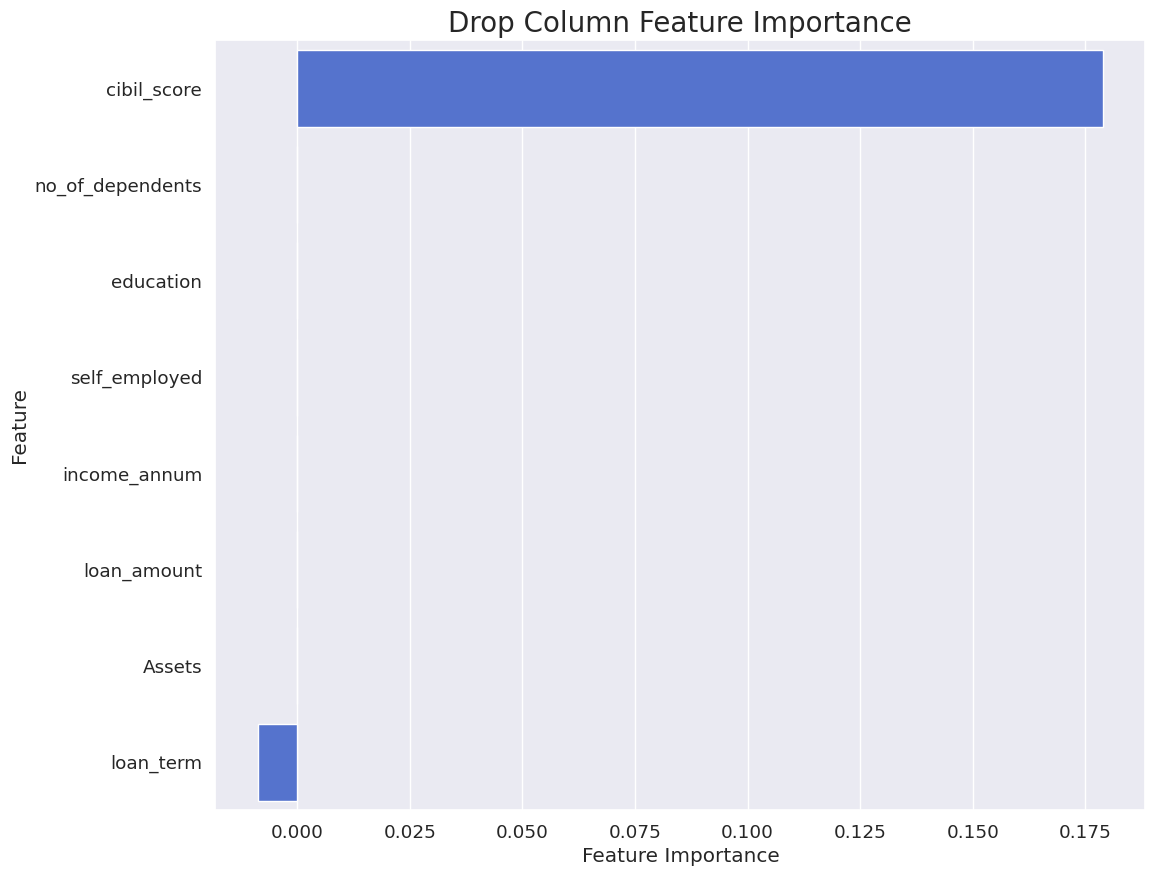

In [53]:
drop_column_importance_plot(logreg_opt, X_train, y_train)


Almost no negative values are observed among Drop-column Feature Importances. In other words, all features are effective in target estimation.

Let's evaluate the Logistic Regression model performance using model_evaluation function:



## Logistic Regression Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1290
           1       0.96      0.92      0.94      2125

    accuracy                           0.93      3415
   macro avg       0.92      0.93      0.93      3415
weighted avg       0.93      0.93      0.93      3415


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       323
           1       0.96      0.94      0.95       531

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.93       854
weighted avg       0.94      0.94      0.94       854



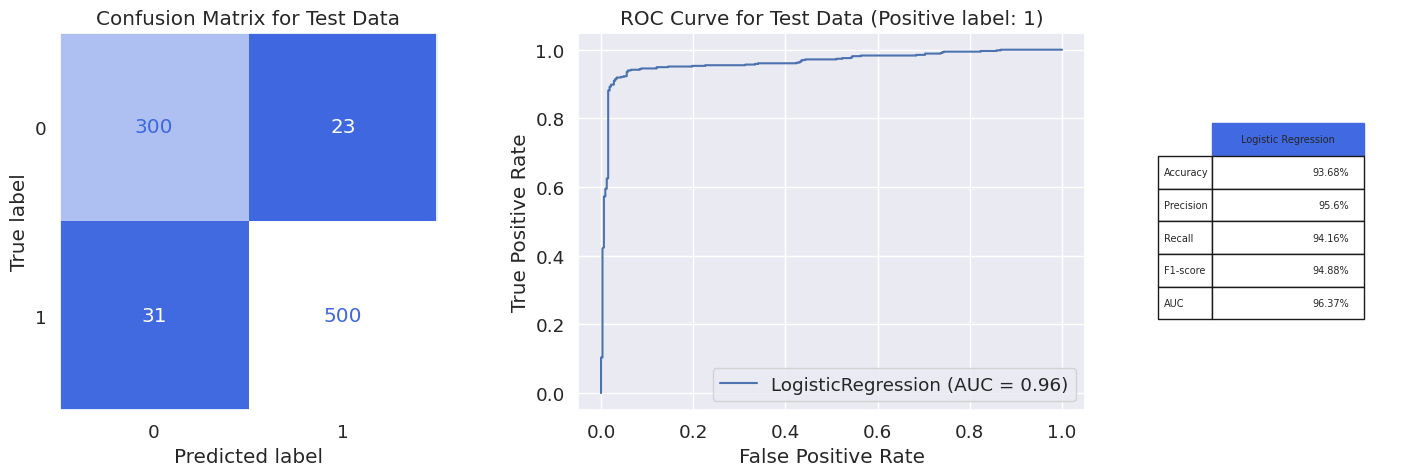

In [54]:
model_evaluation(logreg_opt, X_train, X_test, y_train, y_test, 'Logistic Regression')


In [55]:
# Save the final performance of Logistic Regression classifier
logreg_result = metrics_calculator(logreg_opt, X_test, y_test, 'Logistic Regression')

# KNN Model Building

**KNN (K-Nearest Neighbors)** is a supervised learning algorithm used for classification and regression problems in machine learning. The algorithm works by finding the K nearest data points to a given test sample, and then classifying the test sample based on the majority class among the K nearest neighbors. The algorithm uses a distance metric (such as Euclidean distance) to determine the nearest neighbors. The value of K is a hyperparameter and determines the number of neighbors used to make the prediction.

Advantages:

 - Easy to implement and understand.
 - No need for training, it saves the training data and does not need to estimate parameters.
 - Can be used for both classification and regression problems.

Disadvantages:
 - It requires a large amount of memory to store the training data.
 - Computationally expensive during prediction stage.
 - Does not work well with high dimensional data as the distance metric becomes less effective.
 - It can be biased towards the majority class.
 - Sensitive to outliers.
 - Sensitive to irrelevant features and noisy data. It's important to perform proper feature selection.

## Scale Data using Standard Scaler

As KNN uses a distance metric to find its nearest neighbors, standard scaling (or normalization) is necessary to rescale the features so they have the same scale. Features with different scales and distributions can affect the distance calculation and affect the algorithm's performance.

In [56]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [57]:
# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## KNN Hyperparameter Tunin

KNN classifier hyperparameters are as follows:

 - n_neighbors: This is the number of nearest neighbors that will be used to predict the class of a new sample.

 - weights: This determines how the distances between samples are weighted when making predictions.

  - uniform - all neighbors are weighted equally
  - distance - neighbors closer to the sample are weighted more heavily
 - metric: This is the distance metric used to determine the closest neighbors. The options are:

  - euclidean
  - manhattan
  - minkowski (the generalization of both distances)
 - p: This is the power parameter for the Minkowski metric. When p=1, the Minkowski metric is equivalent to the Manhattan distance; when p=2, it is equivalent to the Euclidean distance. A value of p other than 1 or 2 can be used to weight the contribution of the distances between coordinates differently.

We need to tune the value of hyperparameters for our knn classifier. For this purpose, first we define our hyperparameters grid, and then call tune_clf_hyperparameters function to find the best combination of hyperparameters:

In [58]:
# Define hyperparameters grid to search
param_grid = [{'n_neighbors': np.arange(2, 30), 'metric': ['euclidean','manhattan'], 'weights': ['uniform']},
              {'n_neighbors': np.arange(2, 30), 'metric': ['minkowski'], 'p': [3,4,5], 'weights': ['uniform']}]

Let's call tune_clf_hyperparameters function for hyperparameter tuning:



In [59]:
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)

Best hyperparameters:
 {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}


## KNN Feature Subset Selection

KNN classifiers are sensitive to irrelevant features because they measure distances between instances and weigh each feature equally in the distance calculation. This means that a feature with a high level of randomness or noise can have a large influence on the calculated distances, resulting in inaccurate predictions

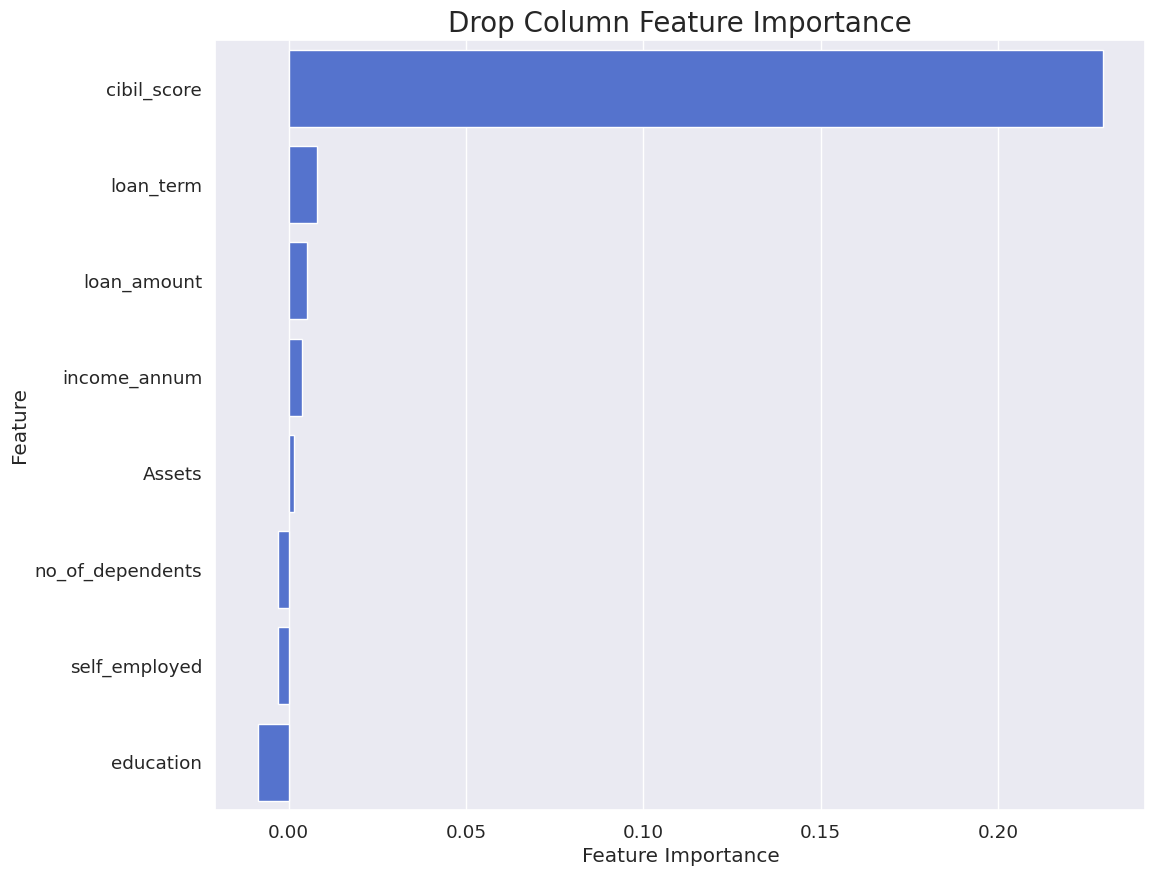

In [60]:
drop_column_importance_plot(knn_opt, X_train, y_train)

In [61]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(knn_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Let's tune the hyperparameters of our model again after removing the irrelevant features:



In [63]:
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)

Best hyperparameters:
 {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


## KNN Model Evaluation

Let's evaluate the KNN model performance using model_evaluation function:




	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1290
           1       0.98      0.98      0.98      2125

    accuracy                           0.97      3415
   macro avg       0.97      0.97      0.97      3415
weighted avg       0.97      0.97      0.97      3415


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       323
           1       0.96      0.98      0.97       531

    accuracy                           0.97       854
   macro avg       0.97      0.96      0.96       854
weighted avg       0.97      0.97      0.97       854



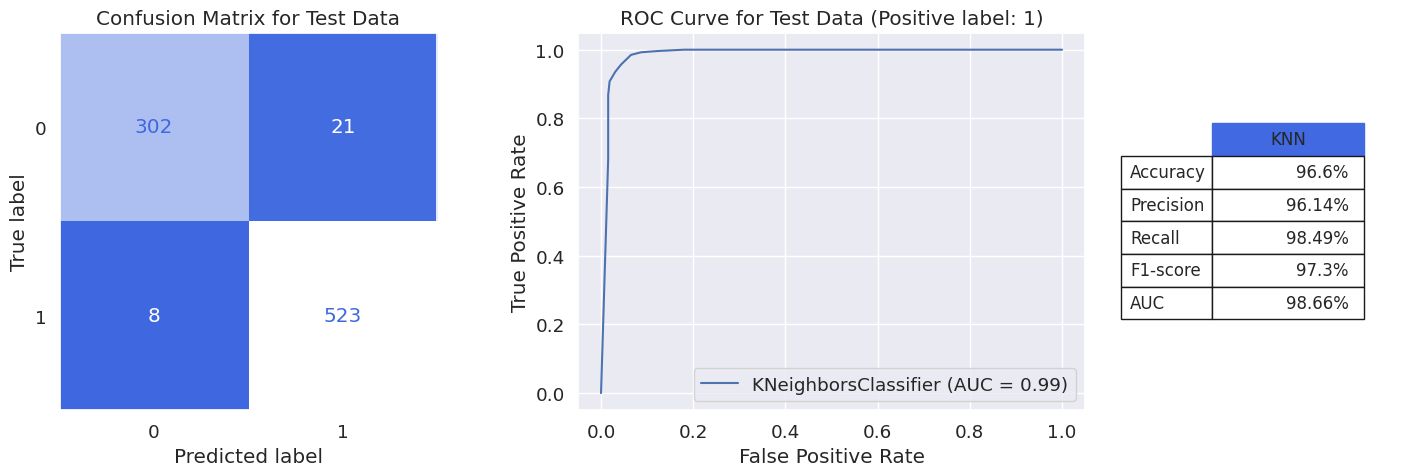

In [64]:
model_evaluation(knn_opt, X_train, X_test, y_train, y_test, 'KNN')

In [65]:
# Save the final performance of KNN classifier
knn_result = metrics_calculator(knn_opt, X_test, y_test, 'K-Nearest Neighbors')

# SVM Model Building

**Support Vector Machine (SVM)** is a type of supervised learning algorithm that is used for classification or regression tasks. It works by finding the best boundary (also known as the decision boundary) that separates the data points into classes, while maximizing the margin (the distance between the boundary and the closest data points from each class, known as support vectors). SVM can handle non-linearly separable data by transforming it into a higher-dimensional space, where it becomes linearly separable.

Advantages:

 - **Robust to outliers**: SVM is less sensitive to outliers compared to other algorithms, making it suitable for tasks where the presence of outliers is expected.

 -**Versatile**: SVM can be used for classification and regression tasks, as well as handling non-linear data through the use of kernel functions.

 - **Effective in high dimensional spaces:** SVM is effective in higher dimensional spaces, where the number of features is greater than the number of samples.

 - **Good performance on smaller datasets:** SVM has a good performance even on smaller datasets and it doesn't require a large amount of training data to produce accurate results.

Disadvantages:

 - **Poor performance on large datasets**: SVM can be computationally intensive and may become slow when the dataset is large.

 -**Overfitting:** SVM can overfit the data, especially when the number of features is much higher than the number of samples.

 - **Limited interpretability:** SVM is a black-box model and it can be difficult to interpret the results and understand how the algorithm makes predictions.

 - **Difficulty in choosing the right kernel function:** The choice of the kernel function is crucial for the performance of SVM and it can be difficult to determine the best one for a particular problem.

## Scale Data using Standard Scaler

SVM (Support Vector Machine) is a distance-based classifier. SVM works by finding the boundary that best separates the data into classes, while maximizing the margin (the distance between the boundary and the closest data points from each class, known as support vectors). This means that SVM is based on the concept of distance and seeks to find the optimal boundary that maximizes the distance between the classes. Therefore, Standard Scaling must be performed before model building:

In [81]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [82]:
# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## SVM Hyperparameter Tuning

SVM classifier hyperparameters are as follows:

 - **C:** This hyperparameter controls the trade-off between achieving a low training error and a low testing error. A smaller value of C results in a wider margin and a larger number of misclassified training examples, while a larger value of C results in a narrower margin and fewer misclassified training examples.

 - **kernel:** This hyperparameter defines the type of kernel function used to transform the input data into a higher dimensional space where a linear boundary can be found. Common kernel functions include the linear, polynomial, rbf(radial basis function), sigmoid and precomputed kernels.

 - **gamma**: Kernel coefficient for rbf, poly and sigmoid kernels.

 - **degree**: This hyperparameter is only relevant when using the polynomial kernel. It defines the degree of the polynomial function used to transform the input data.

The performance of an SVM classifier can be greatly affected by the choice of hyperparameters, and finding the optimal hyperparameters can help improve the performance of the classifier. Therefore, again we define the hyperparameters grid for search, and then call tune_clf_hyperparameters function to find the optimal values for the SVM hyperparameters that best fit our data:

In [83]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,12)]

# Define the hyperparameter grid to search
param_grid = [{'kernel': ['poly'],
               'degree': [2,3,4,5],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
               'C': [0.01,0.1,1, 10, 100, 1000],
               'class_weight': class_weights},

              {'kernel': ['rbf','sigmoid'],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
               'C': [0.01,0.1,1, 10, 100, 1000],
               'class_weight': class_weights},

              {'kernel': ['linear'],
               'C': [0.01,0.1,1, 10, 100, 1000],
               'class_weight': class_weights}
             ]

Tuning hyperparameters for Support Vector Machines (SVM) can be time-consuming as it involves training the model multiple times with different hyperparameter values and evaluating their performance to find the optimal set of hyperparameters. After tuning SVM hyperparameters once, we found that the rbf kernel is the optimal kernel for this dataset. Therefore, we limit our param_grid to the rbf kernel to reduce the program's run time:

In [84]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,12)]

# Define the hyperparameter grid to search
param_grid = [{'kernel': ['rbf'],
               'gamma': [0.1, 0.01, 0.001, 0.0001],
               'C': [0.1, 1, 10, 100, 1000],
               'class_weight': class_weights}]

Let's call tune_clf_hyperparameters function for hyperparameter tuning:



In [85]:
# Create a SVC object
svm = SVC(probability=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
svm_opt = tune_clf_hyperparameters(svm, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 100, 'class_weight': {0: 0.4546363636363636, 1: 0.5453636363636364}, 'gamma': 0.1, 'kernel': 'rbf'}


## SVM Feature Subset Selection

SVM classifiers can be sensitive to irrelevant features. If the input data contains irrelevant features, these features can negatively impact the performance of the SVM classifier. This is because the SVM algorithm considers all features equally when finding the decision boundary, and irrelevant features can distract the algorithm from finding the boundary that separates the classes effectively.

To avoid this issue, it is recommended to perform feature selection before training an SVM classifier, which involves removing any irrelevant or redundant features from the input data. This can improve the performance of the SVM classifier by reducing the complexity of the problem and allowing the algorithm to focus on the most relevant features

Let's evaluate the SVM model performance using model_evaluation function:



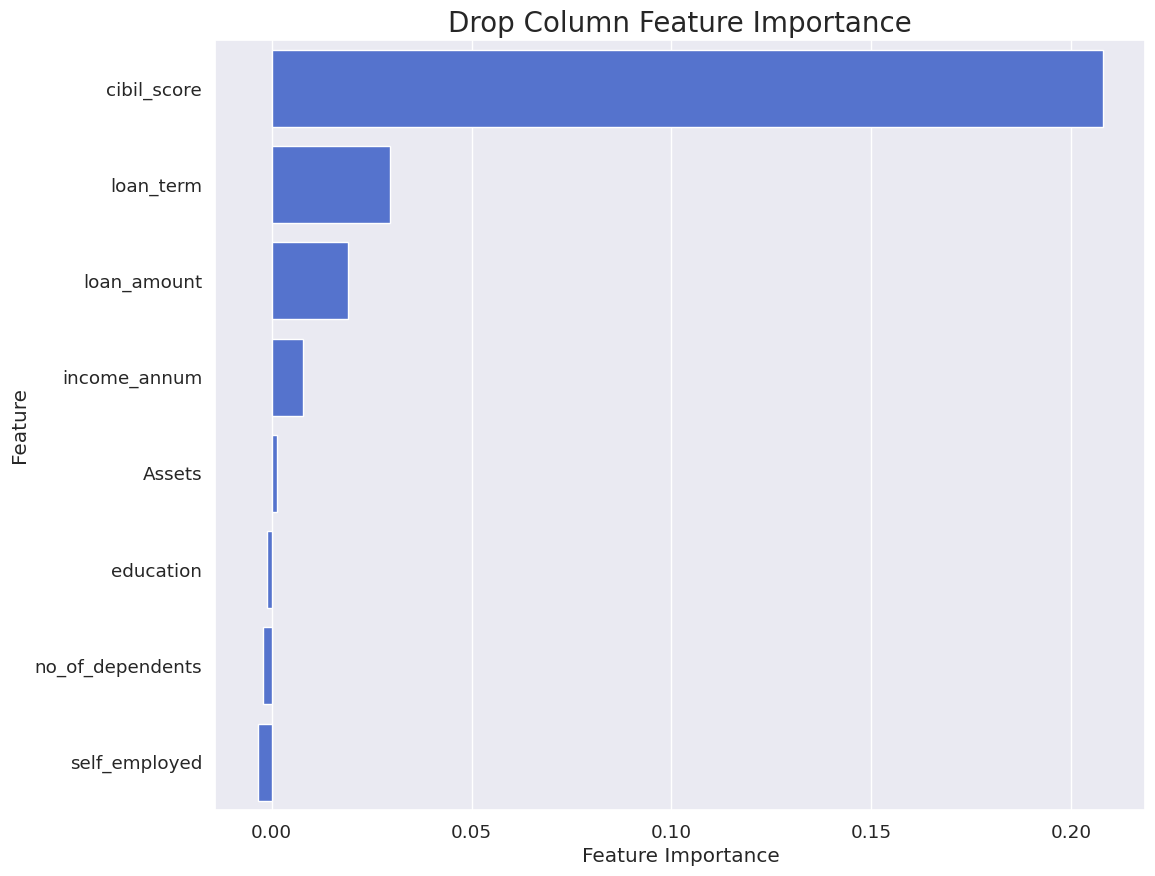

In [87]:
drop_column_importance_plot(svm_opt, X_train, y_train)

In the Drop-Column feature importance output results, several features with negative importance are observed. Removing these features improves the performance of the model. Let's filter our the dataset:

In [88]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(svm_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']  # Threshold value of 0.01

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Let's tune the hyperparameters of our model again after removing the irrelevant features:



In [1]:
# # Create a SVC object
# svm = SVC(probability=True, random_state=0)

# # Find the best classifier with the optimal hyperparameters
# svm_opt = tune_clf_hyperparameters(svm, param_grid, X_train, y_train)

## SVM Model Evaluation

In [2]:
model_evaluation(svm_opt, X_train, X_test, y_train, y_test, 'SVM')


NameError: name 'model_evaluation' is not defined